# House Price Prediction (Linear Regression)
Problem Statement : Given the data, the house price needs to be predicted for houses with different characteristics.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
house_original = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
house_original.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
house_original.shape

(13320, 9)

In [5]:
house_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
house_original.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
house = house_original.drop(['area_type','availability','society','balcony'],axis=1)

In [8]:
house.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# EDA

In [11]:
house.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
house = house.dropna()

In [13]:
house['size'] = house['size'].apply(lambda x : x.split(' ')[0])

<ipython-input-13-06139b010362>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['size'] = house['size'].apply(lambda x : x.split(' ')[0])


(-1.0, 9.0)

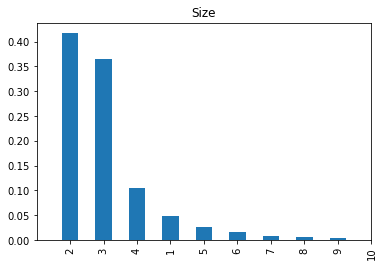

In [23]:
house['size'].value_counts(normalize=True).plot.bar(title = 'Size')
plt.xlim([-1,9])

In [24]:
house['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [25]:
def to_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [26]:
house[~house['total_sqft'].apply(to_float)].head()

,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,43.490
188,KR Puram,2,1015 - 1540,2.0,56.800


The total-sqft column has values in range (e.g. 1133-1384). We will convert these values into a single float value by taking the average.

In [27]:
def conversion(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try: 
        return float(x)
    except:
        return None

In [28]:
house['total_sqft'] = house['total_sqft'].apply(conversion)

In [29]:
house.total_sqft.loc[30]

2475.0

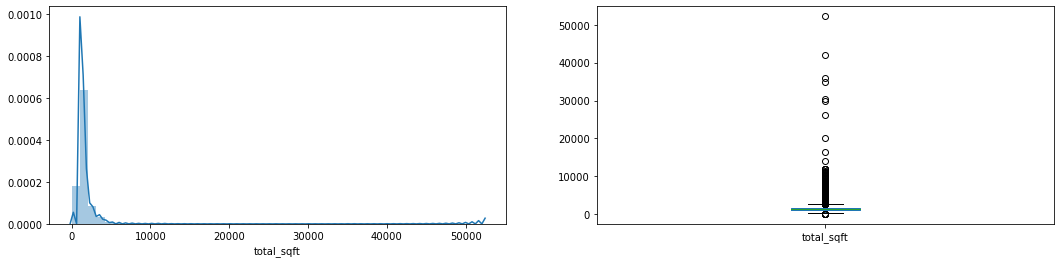

In [38]:
fig = plt.figure(figsize=(18,4))
plt.subplot(121)
sns.distplot(house['total_sqft'])
plt.subplot(122)
house['total_sqft'].plot.box()

The distribution is rightly skewed and shows a presence of a lot of outliers

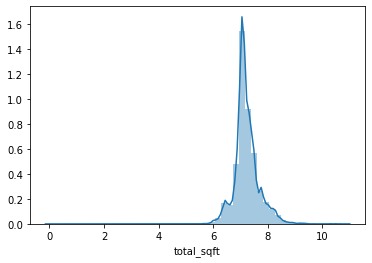

In [35]:
sns.distplot(np.log(house['total_sqft']))

In [39]:
house['total_sqft_log'] = np.log(house['total_sqft'])

In [40]:
house['price_per_sqft'] = house['price']*100000/house['total_sqft']
house.head()

,location,size,total_sqft,bath,price,total_sqft_log,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,6.962243,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,7.863267,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,7.272398,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,7.327123,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,7.090077,4250.000000


In [41]:
len(house['location'].unique())

1304

In [42]:
house['location'] = house['location'].apply(lambda x: x.strip())
location_stats = house.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

There are many locations with only 1 data point. We will now club all the locations with data point less than 10 into one value named 'other'.

In [43]:
location_stats_less_than_10 = location_stats[location_stats<=10]
len(location_stats_less_than_10)

1052

There are 1052 locations with less than 10 data points.

In [44]:
house['location'] = house['location'].apply(lambda x : 'other' if x in location_stats_less_than_10 else x)
len(house['location'].unique())

242

In [45]:
house.head(10)

,location,size,total_sqft,bath,price,total_sqft_log,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,6.962243,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,7.863267,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,7.272398,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,7.327123,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,7.090077,4250.000000
5,Whitefield,2,1170.0,2.0,38.00,7.064759,3247.863248
6,Old Airport Road,4,2732.0,4.0,204.00,7.912789,7467.057101
7,Rajaji Nagar,4,3300.0,4.0,600.00,8.101678,18181.818182
8,Marathahalli,3,1310.0,3.0,63.25,7.177782,4828.244275
9,other,6,1020.0,6.0,370.00,6.927558,36274.509804


In [46]:
house.shape

(13246, 7)

In [55]:
house = house.dropna()

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X = house.drop(['price','price_per_sqft','total_sqft'],axis=1)
y = house['price']

In [58]:
X = pd.get_dummies(X)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lreg = LinearRegression()

In [62]:
lreg.fit(X_train,y_train)

LinearRegression()

In [64]:
predictions = lreg.predict(X_test)

In [65]:
from sklearn import metrics

print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 45.38513829095551
MSE: 10097.042983589472
RMSE: 100.48404342774764


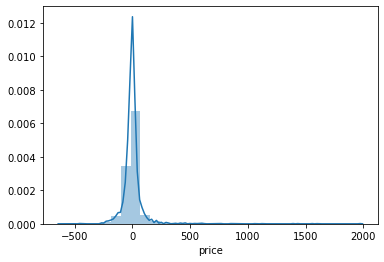

In [67]:
sns.distplot((y_test-predictions),bins=30)